In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics as m
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\medis\projects_nit\EDA\avacado\avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.describe().round(2)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,24.23,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,15.48,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.00,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,10.00,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,24.00,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,38.00,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,52.00,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


In [5]:
data.describe(include='object')

,Date,type,region
count,18249,18249,18249
unique,169,2,54
top,2015-12-27,conventional,Albany
freq,108,9126,338


In [6]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.shape

(18249, 14)

In [10]:
data = data.drop('Unnamed: 0',axis=1)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
data = data.rename(index=str,columns={'4046':'Small Hass','4225':'Large Hass','4770':'XLarge Hass'})

In [12]:
data

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [13]:
data['Date'] = pd.to_datetime(data['Date'])

In [14]:
data.sort_values(by='Date',ascending=True,inplace=True)

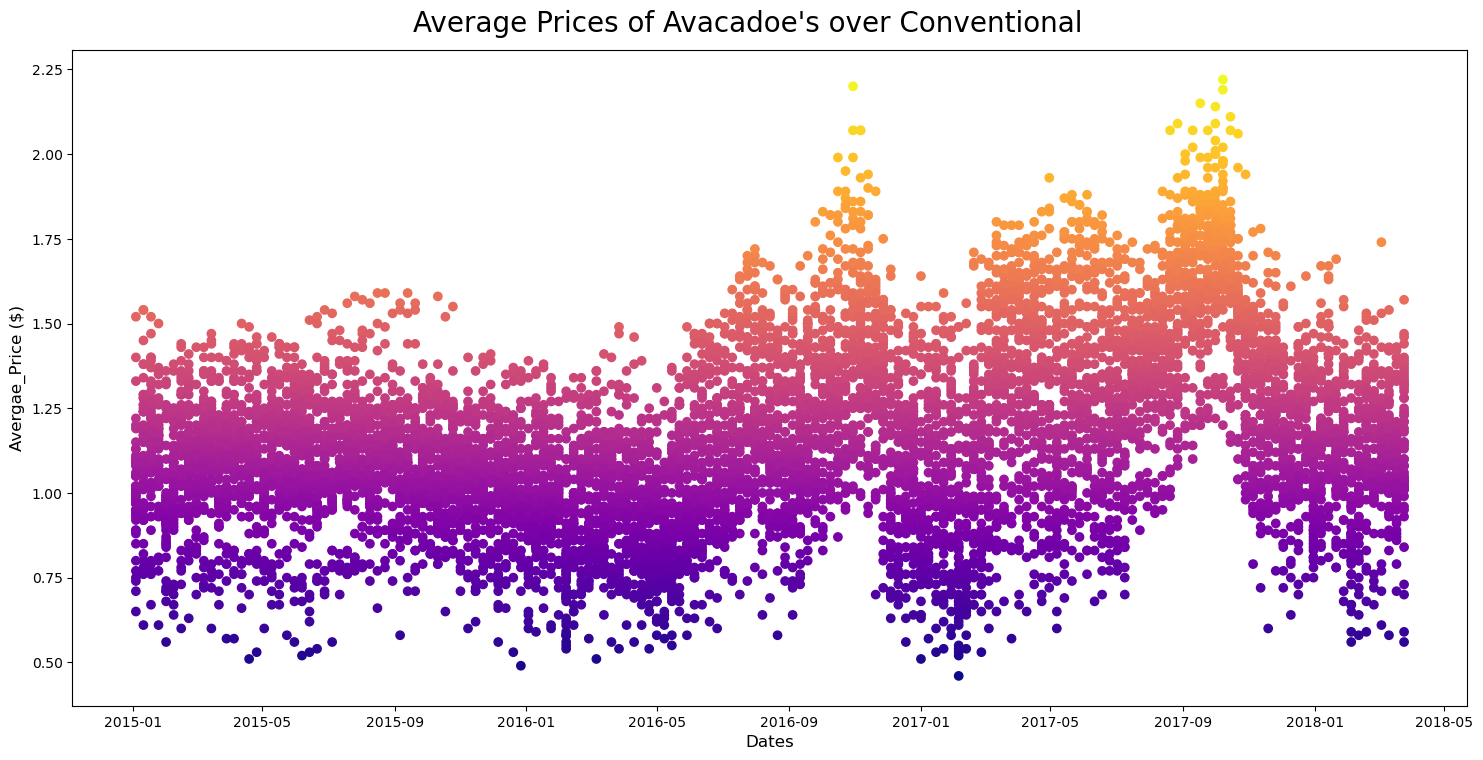

In [15]:
mask = data['type'] == 'conventional'
plt.rc('figure',titlesize=50)

fig = plt.figure(figsize=(18,8))
fig.suptitle("Average Prices of Avacadoe's over Conventional",fontsize=20)

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)


dates = data[mask]['Date'].tolist()
avg_price = data[mask]['AveragePrice'].tolist()

plt.scatter(dates,avg_price,data=data,c=avg_price,cmap='plasma')
ax.set_xlabel('Dates',fontsize=12)
ax.set_ylabel('Avergae_Price ($)',fontsize=12)
plt.show()

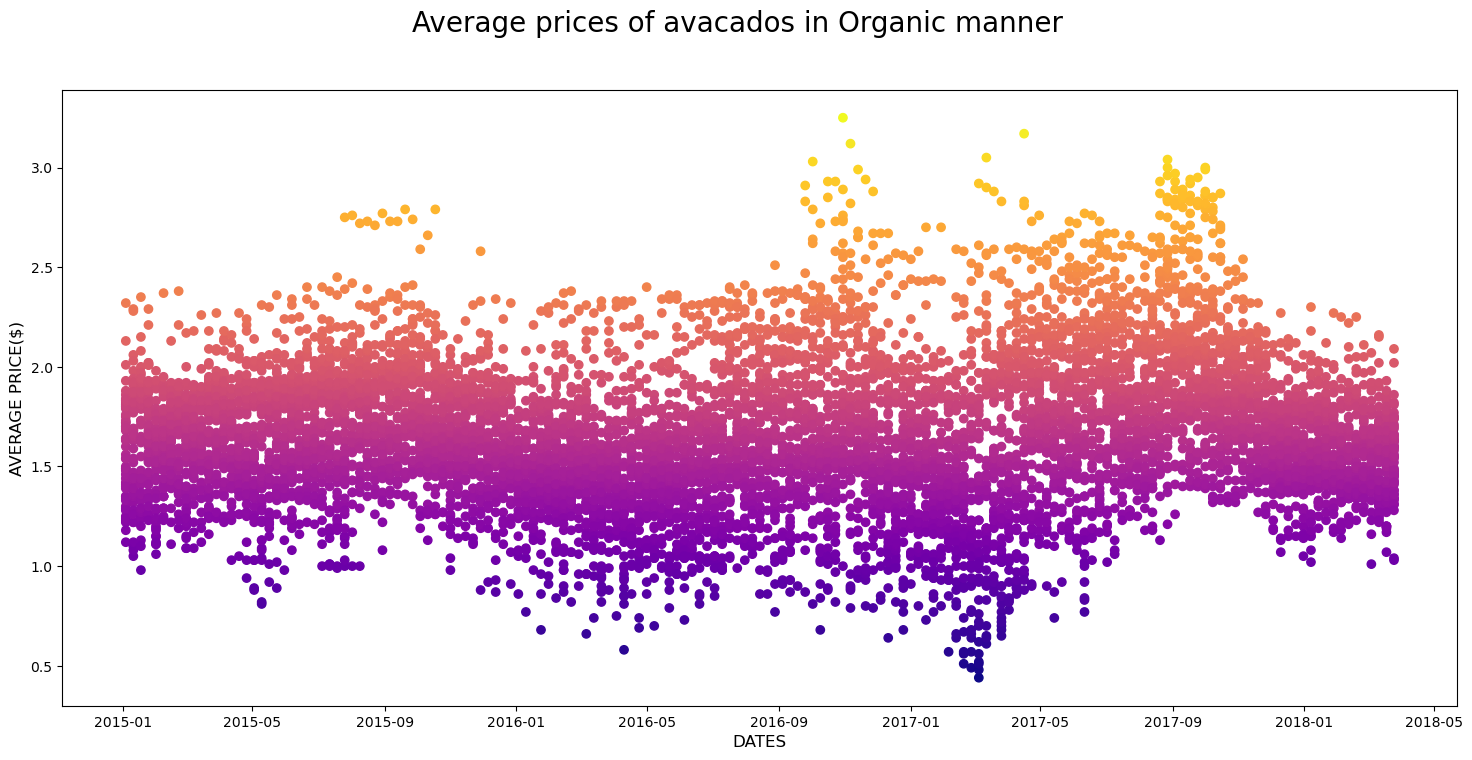

In [16]:
mask = data['type'] == 'organic'
#plt.rc('figure',titlesize=50)

fig = plt.figure(figsize=(18,8))

fig.suptitle('Average prices of avacados in Organic manner',fontsize=20)

ax = fig.add_subplot(111)
#fig.subplots_adjust(top=0.93)

dates_o = data[mask]['Date'].tolist()
avg_prices_o = data[mask]['AveragePrice'].tolist()

plt.scatter(dates_o,avg_prices_o,c=avg_prices_o,data=data,cmap='plasma')
ax.set_xlabel('DATES',fontsize=12)
ax.set_ylabel("AVERAGE PRICE($)",fontsize=12)
plt.show()

In [17]:
data.drop('Date',axis=1,inplace=True)

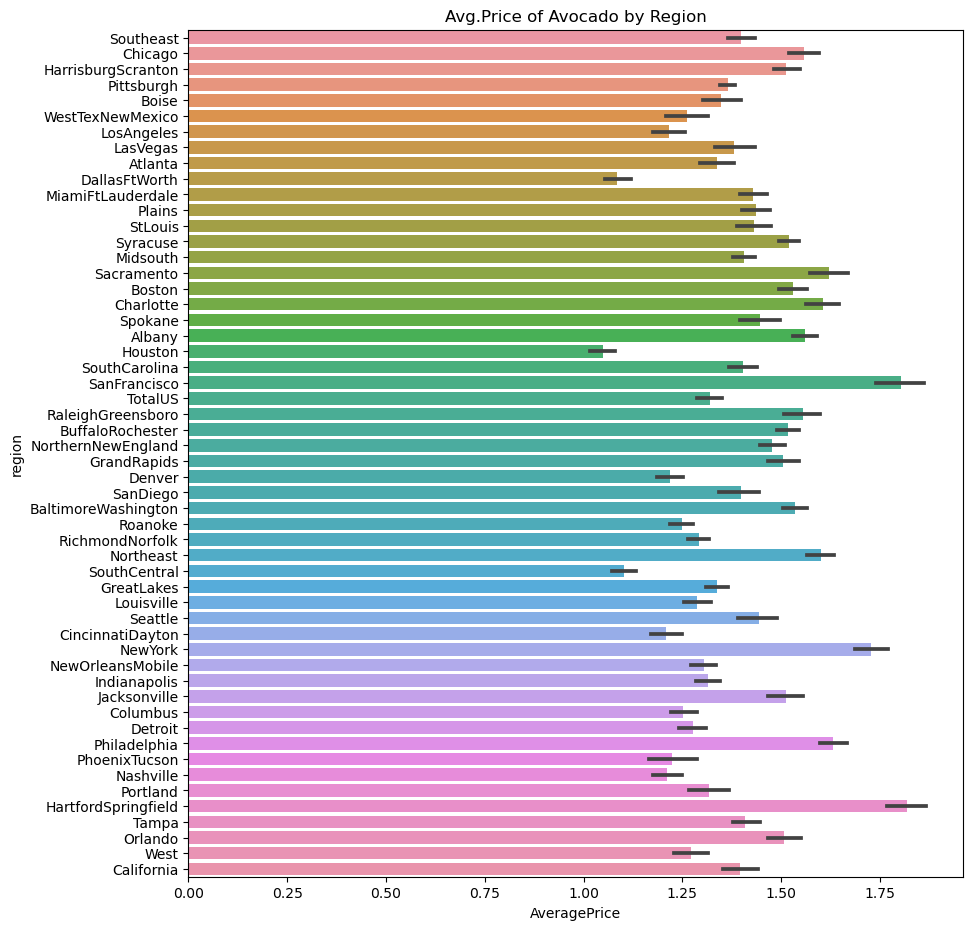

In [18]:
# The average prices by regions

plt.figure(figsize=(10,11))
plt.title("Avg.Price of Avocado by Region")
Av= sns.barplot(x="AveragePrice",y="region",data= data)

In [19]:
type_counts = data.groupby('type').size()
print(type_counts) 

type
conventional    9126
organic         9123
dtype: int64


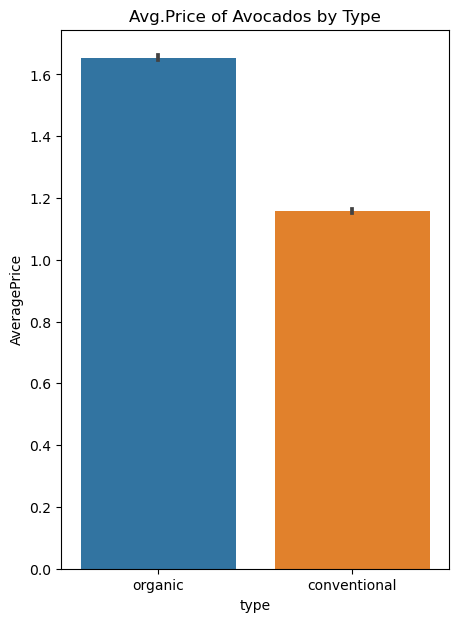

In [20]:
# The average prices of avocados by types; organic or not

plt.figure(figsize=(5,7))
plt.title("Avg.Price of Avocados by Type")
Av= sns.barplot(x="type",y="AveragePrice",data= data)


In [21]:
data[['Small Hass', "Large Hass", "XLarge Hass",'Small Bags','Large Bags','XLarge Bags','Total Volume','Total Bags']].corr()

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,Total Volume,Total Bags
Small Hass,1.000000,0.926110,0.833389,0.925280,0.838645,0.699377,0.977863,0.920057
Large Hass,0.926110,1.000000,0.887855,0.916031,0.810015,0.688809,0.974181,0.905787
XLarge Hass,0.833389,0.887855,1.000000,0.802733,0.698471,0.679861,0.872202,0.792314
Small Bags,0.925280,0.916031,0.802733,1.000000,0.902589,0.806845,0.967238,0.994335
Large Bags,0.838645,0.810015,0.698471,0.902589,1.000000,0.710858,0.880640,0.943009
XLarge Bags,0.699377,0.688809,0.679861,0.806845,0.710858,1.000000,0.747157,0.804233
Total Volume,0.977863,0.974181,0.872202,0.967238,0.880640,0.747157,1.000000,0.963047
Total Bags,0.920057,0.905787,0.792314,0.994335,0.943009,0.804233,0.963047,1.000000


<Axes: >

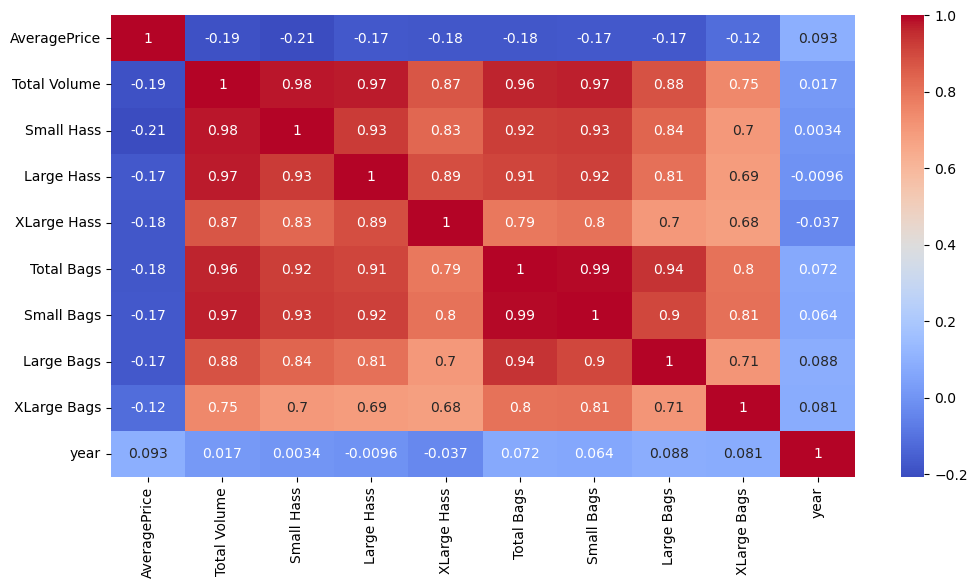

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [23]:
data[['Small Bags','Large Bags','XLarge Bags']].sum().sum()

4373175785.39

In [24]:
round(data['Total Bags'].sum(),2)

4373175798.39

In [25]:
data_V = data.drop(['AveragePrice', 'Total Volume', 'Total Bags'], axis = 1).groupby('year').agg('sum')
data_V

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
year,,,,,,
2015,1.709450e+09,1.761054e+09,1.427724e+08,6.346827e+08,1.320664e+08,5443128.28
2016,1.525123e+09,1.672728e+09,1.598798e+08,1.106494e+09,3.366263e+08,20038284.84
2017,1.652038e+09,1.544735e+09,9.121751e+07,1.222953e+09,3.993390e+08,23997172.34
2018,4.604997e+08,4.077587e+08,2.293259e+07,3.607414e+08,1.235840e+08,7210591.87


In [26]:
indexes = ['Small Hass', 'Large Hass', 'XLarge Hass', 'Small Bags', 'Large Bags', 'XLarge Bags']
series = pd.DataFrame({'2015': data_V.loc[[2015],:].values.tolist()[0],
                      '2016': data_V.loc[[2016],:].values.tolist()[0],
                      '2017': data_V.loc[[2017],:].values.tolist()[0],
                      '2018': data_V.loc[[2018],:].values.tolist()[0]}, index=indexes)

Text(0, 0.5, '')

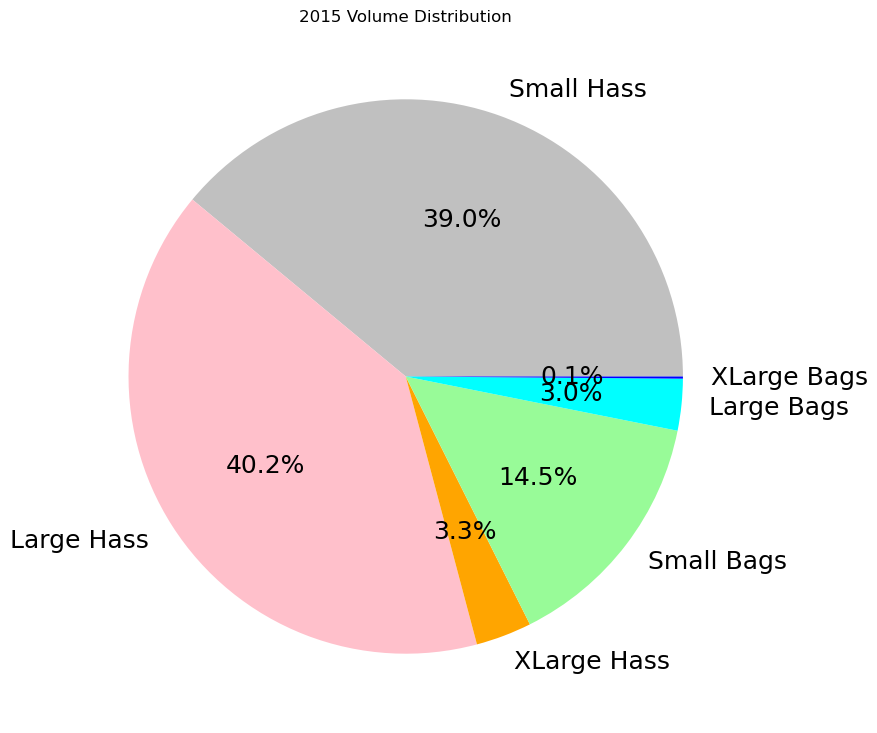

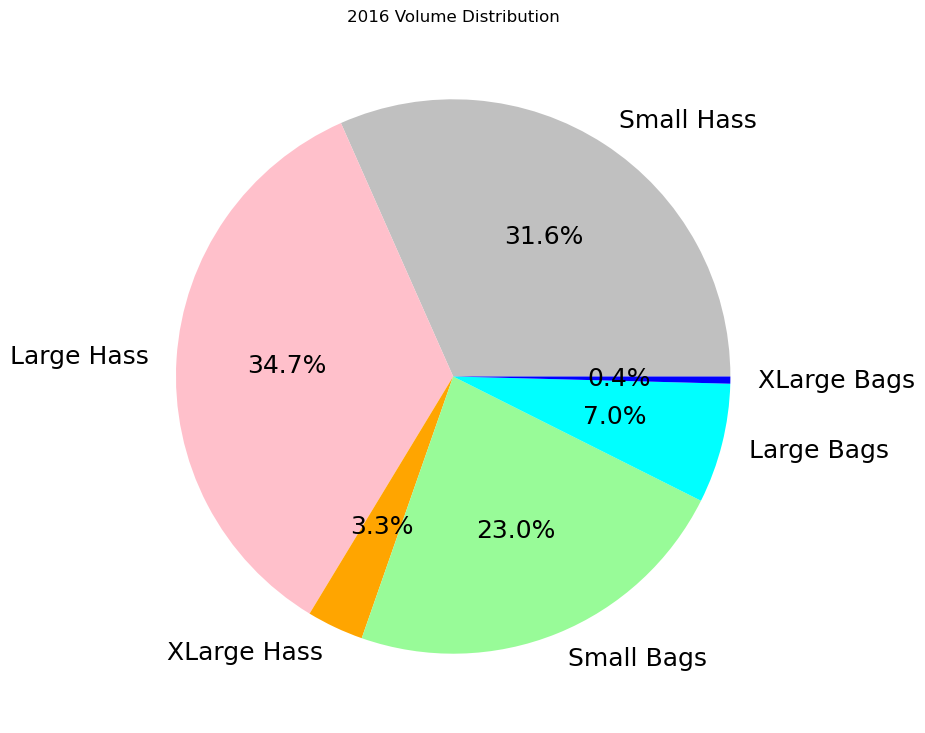

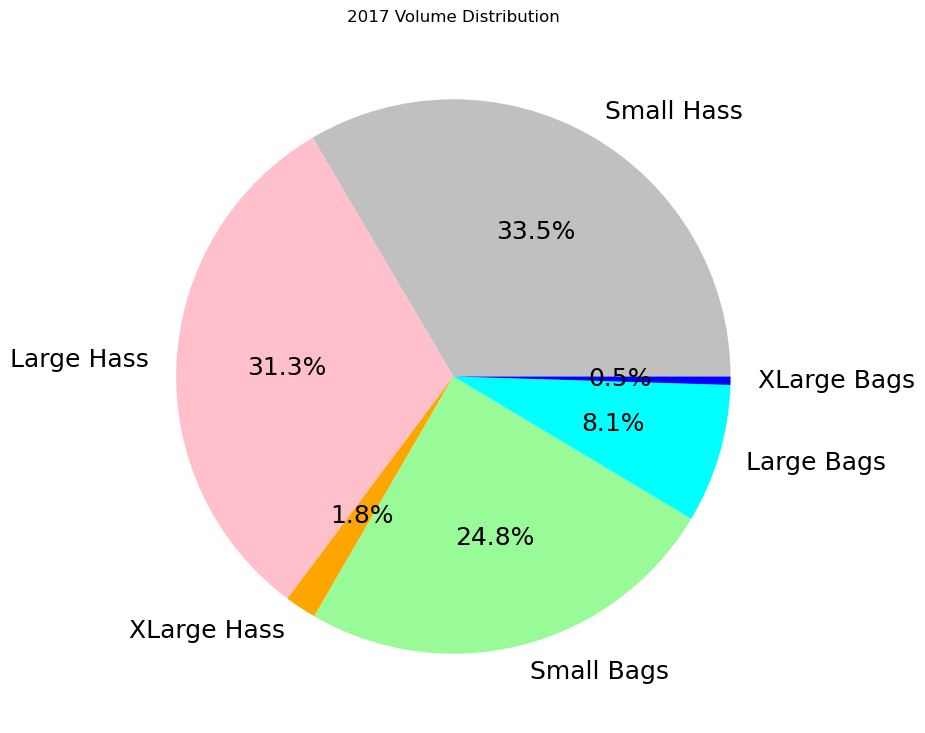

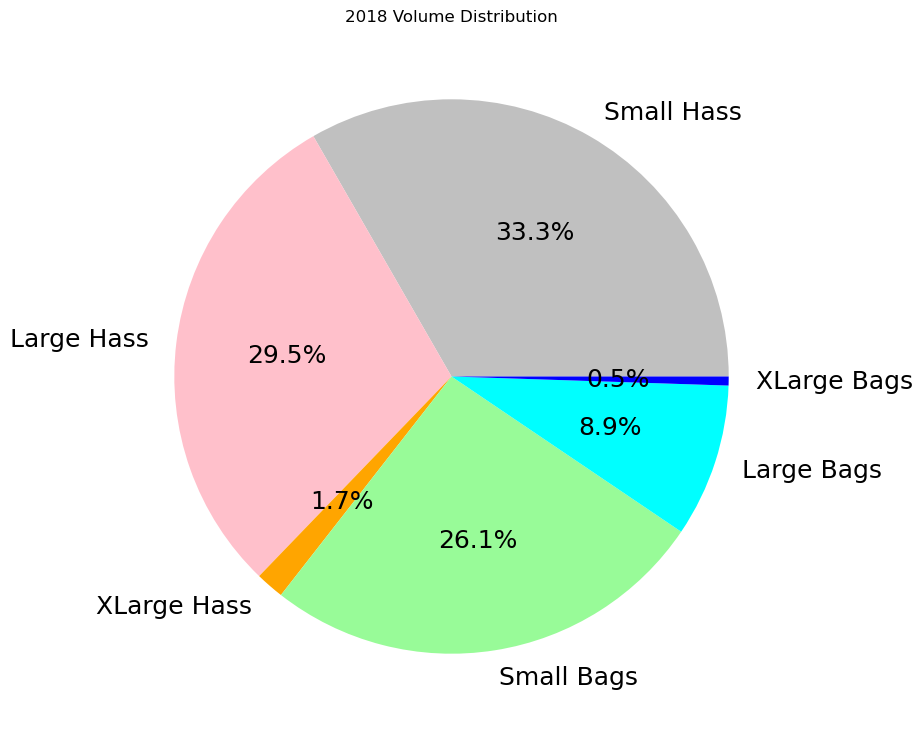

In [27]:
series.plot.pie(y='2015',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2015 Volume Distribution').set_ylabel('')
series.plot.pie(y='2016',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2016 Volume Distribution').set_ylabel('')
series.plot.pie(y='2017',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2017 Volume Distribution').set_ylabel('')
series.plot.pie(y='2018',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2018 Volume Distribution').set_ylabel('')

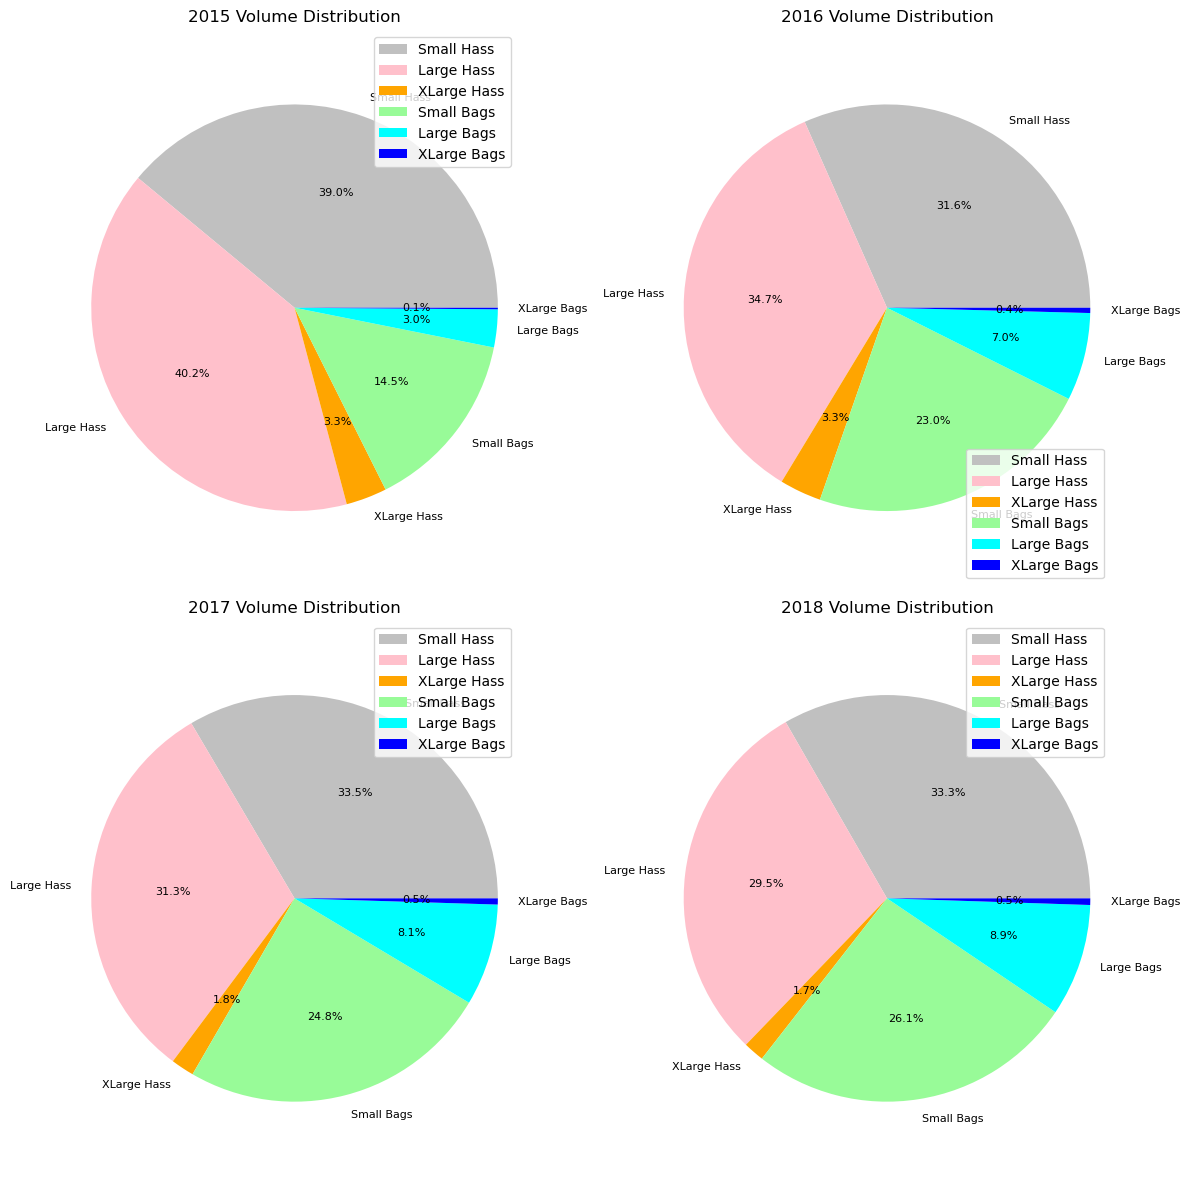

In [28]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

series.plot.pie(y='2015', autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=8, legend=True, ax=axs[0, 0], title='2015 Volume Distribution').set_ylabel('')
axs[0, 0].axis('equal')

series.plot.pie(y='2016', autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=8, legend=True, ax=axs[0, 1], title='2016 Volume Distribution').set_ylabel('')
axs[0, 1].axis('equal')

series.plot.pie(y='2017', autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=8, legend=True, ax=axs[1, 0], title='2017 Volume Distribution').set_ylabel('')
axs[1, 0].axis('equal')

series.plot.pie(y='2018', autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=8, legend=True, ax=axs[1, 1], title='2018 Volume Distribution').set_ylabel('')
axs[1, 1].axis('equal')

plt.tight_layout()
plt.show()

In [29]:
# Total Bags = Small Bags + Large Bags + XLarge Bags
# Total Volume = Small Hass +Large Hass +XLarge Hass + Total Bags , to avoid multicollinearity I also drop Total Volume column.

data = data.drop(['Total Bags','Total Volume'], axis = 1)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 11569 to 8814
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Small Hass    18249 non-null  float64
 2   Large Hass    18249 non-null  float64
 3   XLarge Hass   18249 non-null  float64
 4   Small Bags    18249 non-null  float64
 5   Large Bags    18249 non-null  float64
 6   XLarge Bags   18249 non-null  float64
 7   type          18249 non-null  object 
 8   year          18249 non-null  int64  
 9   region        18249 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 2.0+ MB


In [31]:
#pd.set_option('display.width', 100)
#pd.set_option('precision', 3)
correlations = data.corr()
print(correlations)

              AveragePrice  Small Hass  Large Hass  XLarge Hass  Small Bags  \
AveragePrice      1.000000   -0.208317   -0.172928    -0.179446   -0.174730   
Small Hass       -0.208317    1.000000    0.926110     0.833389    0.925280   
Large Hass       -0.172928    0.926110    1.000000     0.887855    0.916031   
XLarge Hass      -0.179446    0.833389    0.887855     1.000000    0.802733   
Small Bags       -0.174730    0.925280    0.916031     0.802733    1.000000   
Large Bags       -0.172940    0.838645    0.810015     0.698471    0.902589   
XLarge Bags      -0.117592    0.699377    0.688809     0.679861    0.806845   
year              0.093197    0.003353   -0.009559    -0.036531    0.063915   

              Large Bags  XLarge Bags      year  
AveragePrice   -0.172940    -0.117592  0.093197  
Small Hass      0.838645     0.699377  0.003353  
Large Hass      0.810015     0.688809 -0.009559  
XLarge Hass     0.698471     0.679861 -0.036531  
Small Bags      0.902589     0.806845 

In [32]:
data.head(1)

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,1.75,9307.34,3844.81,615.28,13061.1,537.36,0.0,organic,2015,Southeast


In [33]:
ss = StandardScaler()
data.iloc[:,:-4] = ss.fit_transform(data.iloc[:,:-4])
data.head(2)

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,0.854361,-0.224278,-0.241934,-0.206814,-0.226673,-0.220532,0.0,organic,2015,Southeast
9593,0.208663,-0.230695,-0.232148,-0.212540,-0.242963,-0.222734,0.0,organic,2015,Chicago


In [34]:
X = data.drop('AveragePrice',axis=1)

In [35]:
y = data['AveragePrice']

In [36]:
x = pd.get_dummies(X,columns=['type','region'],drop_first=True)
x.head()

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,year,type_organic,region_Atlanta,region_BaltimoreWashington,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
11569,-0.224278,-0.241934,-0.206814,-0.226673,-0.220532,0.0,2015,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9593,-0.230695,-0.232148,-0.212540,-0.242963,-0.222734,0.0,2015,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10009,-0.231508,-0.244955,-0.212540,-0.240789,-0.222734,0.0,2015,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1819,-0.229254,-0.215680,-0.198007,-0.229080,-0.207730,0.0,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9333,-0.231635,-0.244189,-0.212540,-0.243927,-0.221965,0.0,2015,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
x.shape

(18249, 61)

In [38]:
final_data = pd.concat([y,x],axis=1)

In [39]:
final_data

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,year,type_organic,region_Atlanta,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
11569,0.854361,-0.224278,-0.241934,-0.206814,-0.226673,-0.220532,0.00,2015,1,0,...,0,0,1,0,0,0,0,0,0,0
9593,0.208663,-0.230695,-0.232148,-0.212540,-0.242963,-0.222734,0.00,2015,1,0,...,0,0,0,0,0,0,0,0,0,0
10009,0.680519,-0.231508,-0.244955,-0.212540,-0.240789,-0.222734,0.00,2015,1,0,...,0,0,0,0,0,0,0,0,0,0
1819,0.283167,-0.229254,-0.215680,-0.198007,-0.229080,-0.207730,0.00,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
9333,0.581181,-0.231635,-0.244189,-0.212540,-0.243927,-0.221965,0.00,2015,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,-0.114185,-0.118840,0.139510,1.415731,-0.105360,-0.130641,1362.59,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
9018,-1.753263,2.930325,0.557630,0.067849,4.310582,2.017024,69152.63,2018,0,0,...,0,1,0,0,0,0,0,0,0,0
18141,0.034822,-0.208510,-0.240908,-0.212540,-0.098025,-0.140298,0.00,2018,1,0,...,0,1,0,0,0,0,0,0,0,0
17673,0.730188,-0.208201,-0.186176,-0.212540,-0.124331,-0.221885,0.00,2018,1,0,...,0,0,0,0,0,0,0,0,0,0


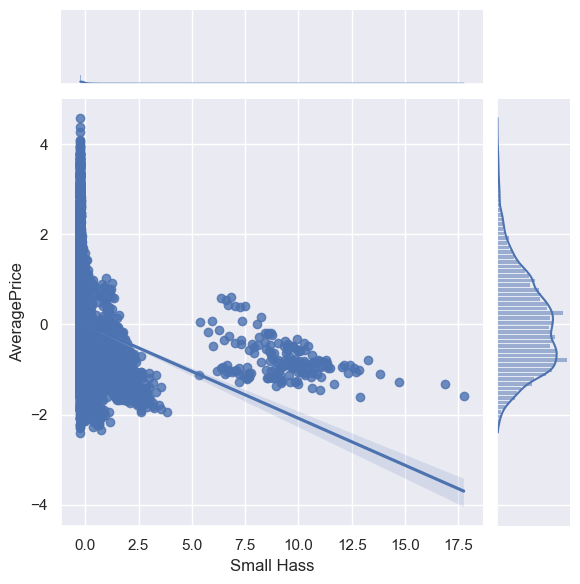

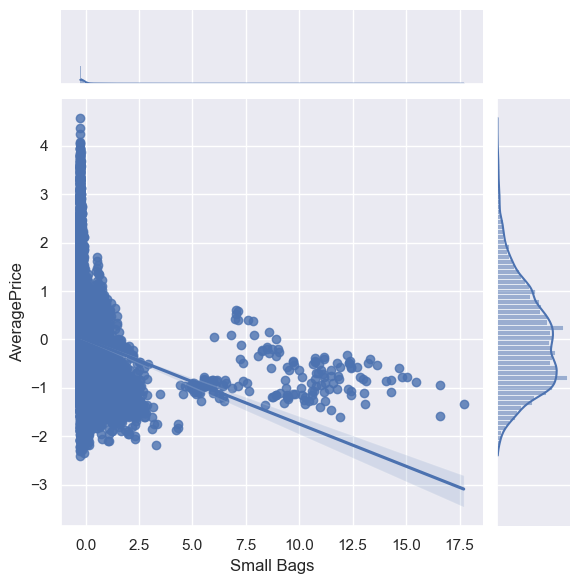

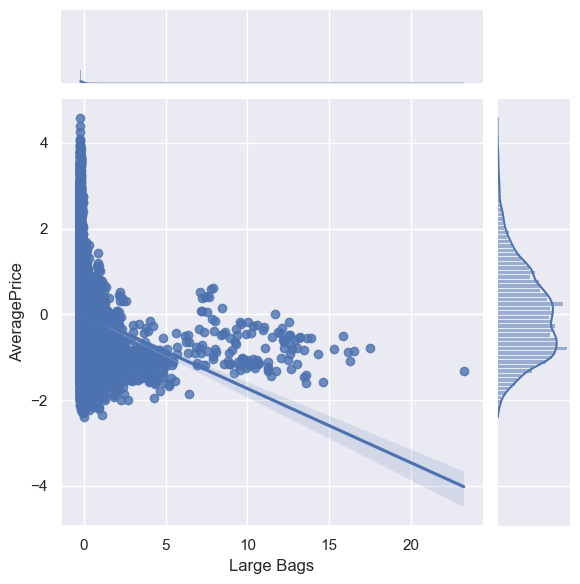

In [40]:
sns.set(color_codes=True)
sns.jointplot(x="Small Hass", y="AveragePrice", data=final_data, kind="reg");
sns.jointplot(x="Small Bags", y="AveragePrice", data=final_data, kind="reg");
sns.jointplot(x="Large Bags", y="AveragePrice", data=final_data, kind="reg");

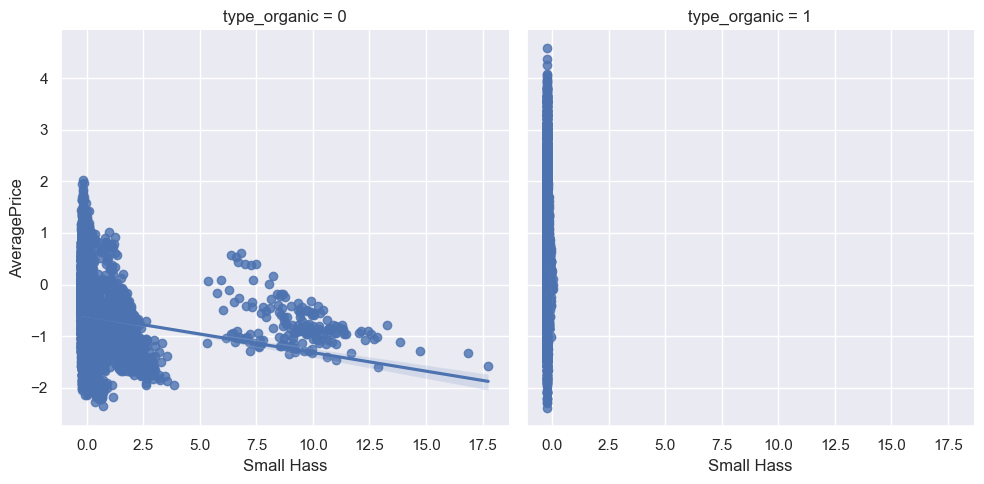

In [41]:
sns.lmplot(x="Small Hass", y="AveragePrice", col="type_organic", data=final_data, col_wrap=2)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
y_pred = lr.predict(x_test)

In [45]:
# Here we get result in standarized values, if we want to see the values in original number format
ss = StandardScaler()
ss.fit(data[['AveragePrice']])

original_pred = ss.inverse_transform(pd.DataFrame(y_pred))
original_test = ss.inverse_transform(pd.DataFrame(y_test))
print("original values and predicted values")
pd.DataFrame({'Original':original_test.flatten(),'Predicted':original_pred.flatten()})
#here we get both the orginal and predicted values in 2d arrray,but it is impossible to create the dataframe of two features at once 
#for that,we convert the 2d array into the 1d arry
#flatten()

original values and predicted values


,Original,Predicted
0,-0.735048,-0.376836
1,0.680519,0.586690
2,1.748403,1.703302
3,1.847741,-0.200190
4,0.730188,0.734384
...,...,...
3645,0.134160,0.596539
3646,-1.678759,-0.838002
3647,0.953699,1.124759
3648,-0.486703,-0.742197


In [46]:
r2_score = m.r2_score(y_test,y_pred)
print('r2-score of data is',r2_score*100)

r2-score of data is 55.915656420434026


In [47]:
print('MAE: ',m.mean_absolute_error(y_test, y_pred))
print('MSE: ',m.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(m.mean_squared_error(y_test, y_pred)))
print('RMSE:',np.sqrt(m.mean_squared_error(y_test, y_pred)))


MAE:  0.49873580675944923
MSE:  0.44390882140109006
RMSE: 0.6662648282785832
RMSE: 0.6662648282785832


In [48]:
ss = StandardScaler()
ss.fit(data[['AveragePrice']].values)
# Reshape y_pred to a 2D array

# Perform the inverse transformation
original_pred = ss.inverse_transform(y_pred.reshape(1,-1))

In [49]:
original_pred

array([[-0.37683618,  0.58669024,  1.70330242, ...,  1.12475859,
        -0.74219683, -0.86110254]])

In [50]:
y_pred

array([-0.37683618,  0.58669024,  1.70330242, ...,  1.12475859,
       -0.74219683, -0.86110254])

In [51]:
ss.inverse_transform(pd.DataFrame(y_pred))

array([[-0.37683618],
       [ 0.58669024],
       [ 1.70330242],
       ...,
       [ 1.12475859],
       [-0.74219683],
       [-0.86110254]])

In [52]:
ss.inverse_transform(pd.DataFrame(y_test))

array([[-0.73504781],
       [ 0.68051913],
       [ 1.74840296],
       ...,
       [ 0.95369871],
       [-0.48670273],
       [-0.80955133]])

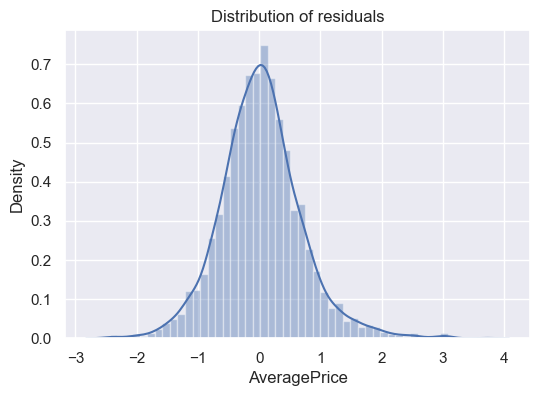

In [53]:
plt.figure(figsize=(6,4))
sns.distplot(y_test - y_pred)
plt.title('Distribution of residuals');

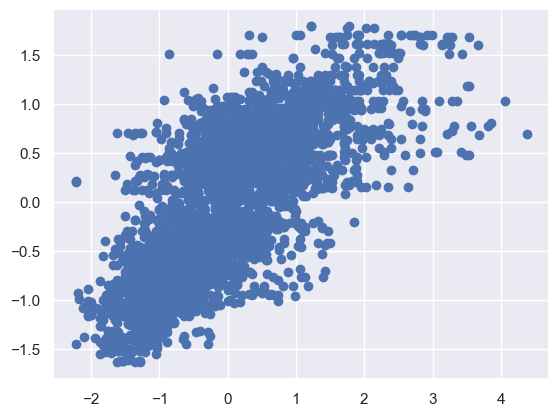

In [54]:
plt.scatter(y_test,lr.predict(x_test))

In [55]:
import statsmodels.api as sm
X_train = sm.add_constant(x_train) # adding a constant
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     299.9
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:26:38   Log-Likelihood:                -14755.
No. Observations:               14599   AIC:                         2.963e+04
Df Residuals:                   14537   BIC:                         3.011e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
alphas = np.logspace(-5,3,20)

clf = GridSearchCV(estimator=linear_model.Ridge(), param_grid=dict(alpha=alphas), cv=10)
clf.fit(X_train, y_train)
optlamGSCV_R = clf.best_estimator_.alpha
print('Optimum regularization parameter (Ridge):', optlamGSCV_R)

clf = GridSearchCV(estimator=linear_model.Lasso(), param_grid=dict(alpha=alphas), cv=10)
clf.fit(X_train, y_train)
optlamGSCV_L= clf.best_estimator_.alpha
print('Optimum regularization parameter (Lasso):', optlamGSCV_L) 

Optimum regularization parameter (Ridge): 0.06158482110660261
Optimum regularization parameter (Lasso): 1e-05


In [57]:
ridge = linear_model.Ridge(alpha = optlamGSCV_R) 
ridge.fit(x_train, y_train)
print('RMSE value of the Ridge Model is: ',np.sqrt(m.mean_squared_error(y_test, ridge.predict(x_test))))

RMSE value of the Ridge Model is:  0.6662579259124138


In [58]:

ridge = linear_model.Ridge(alpha = optlamGSCV_R)

lasso = linear_model.Lasso(alpha = optlamGSCV_L)
lasso.fit(x_train, y_train)
print('RMSE value of the Lasso Model is: ',np.sqrt(m.mean_squared_error(y_test, lasso.predict(x_test))))


RMSE value of the Lasso Model is:  0.6662461839646584


Lasso picked 61 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

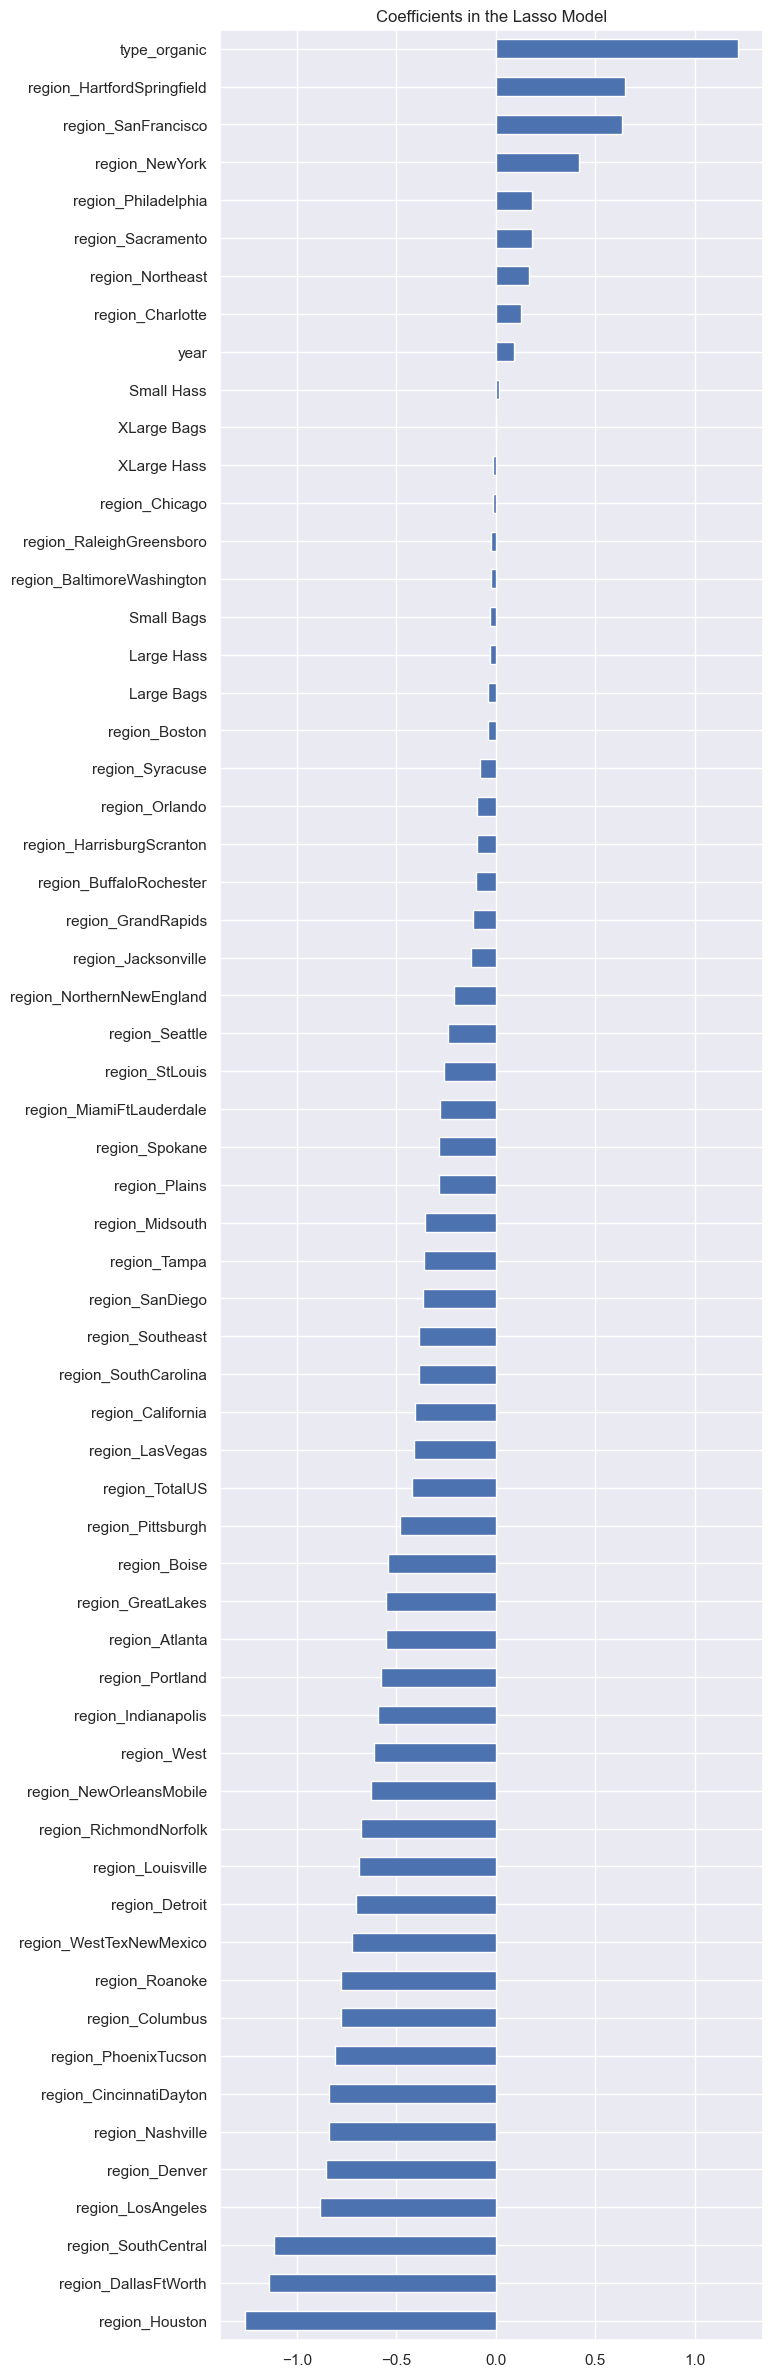

In [59]:
import matplotlib
coef = pd.Series(lasso.coef_, index = x_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")
imp_coef = pd.concat([coef.sort_values()]) #plot all
plt.rcParams['figure.figsize'] = (7.0, 30.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [61]:
algo = {
    "linear_regression":LinearRegression(),
    "KNN_regressor":KNeighborsRegressor(),
    "SVM":SVR(),
    "DecisionTree_regressor":DecisionTreeRegressor(),
    "Randomforest_Regressor":RandomForestRegressor(),
    "Xgboost_regressor":XGBRegressor()
}

In [62]:
for name,model in algo.items():
    print("Algorithm Name-{}".format(name))
    print("--------------------------------------")
    
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(y_pred)
    print("--------------------------------------")
    print()
    r2 = m.r2_score(y_test,y_pred)
    print(" r2-score of {} is {}".format(name,r2_score*100))
    print("------------------------------------------")
    print()
    print("mean absolute error =",m.mean_absolute_error(y_test,y_pred)*100)
    print("mean squared error =",m.mean_squared_error(y_test,y_pred)*100)
    print("Root mean squared error =",np.sqrt(m.mean_absolute_error(y_test,y_pred)*100))
    print("---------------------------------------------")

Algorithm Name-linear_regression
--------------------------------------
[-0.37683618  0.58669024  1.70330242 ...  1.12475859 -0.74219683
 -0.86110254]
--------------------------------------

 r2-score of linear_regression is 55.915656420434026
------------------------------------------

mean absolute error = 49.87358067594492
mean squared error = 44.39088214010901
Root mean squared error = 7.062122958144026
---------------------------------------------
Algorithm Name-KNN_regressor
--------------------------------------
[-0.75988232  0.68051913  1.81297268 ...  0.98846702 -0.34266259
 -0.45193442]
--------------------------------------

 r2-score of KNN_regressor is 55.915656420434026
------------------------------------------

mean absolute error = 39.58811031076353
mean squared error = 31.010632768585783
Root mean squared error = 6.291908320276411
---------------------------------------------
Algorithm Name-SVM
--------------------------------------
[-0.51083001  0.06047801  0.0604994

In [63]:
results=[]

for name,model in algo.items():
    print("Algorithm Name-{}".format(name))
    print("--------------------------------------")
    
    model = model.fit(x_train,y_train)
    #print("Coeficient of the {} is {}".format(name,model.coef_))
    #ml['Coefcient'] = model.coef_
    
    y_pred = model.predict(x_test)
    print(y_pred)
    print("--------------------------------------")
    print()
    r2 = m.r2_score(y_test,y_pred)
    print(" r2-score of {} is {}".format(name,r2_score*100))

    print("------------------------------------------")
    print()
    mae = m.mean_absolute_error(y_test,y_pred)
    print("mean absolute error =",mae*100)
    
    mse = m.mean_squared_error(y_test,y_pred)
    print("mean squared error =",mse*100)
    
    rmse = np.sqrt(m.mean_squared_error(y_test,y_pred))
    print("Root mean squared error =",rmse*100)
    print("**********************************************")
    results.append({'Algorithm': name, 'r2_score': r2 * 100, 'MAE': mae * 100, 'MSE': mse * 100, 'RMSE': rmse * 100})
ml_reults = pd.DataFrame(results)

Algorithm Name-linear_regression
--------------------------------------
[-0.37683618  0.58669024  1.70330242 ...  1.12475859 -0.74219683
 -0.86110254]
--------------------------------------

 r2-score of linear_regression is 55.915656420434026
------------------------------------------

mean absolute error = 49.87358067594492
mean squared error = 44.39088214010901
Root mean squared error = 66.62648282785833
**********************************************
Algorithm Name-KNN_regressor
--------------------------------------
[-0.75988232  0.68051913  1.81297268 ...  0.98846702 -0.34266259
 -0.45193442]
--------------------------------------

 r2-score of KNN_regressor is 55.915656420434026
------------------------------------------

mean absolute error = 39.58811031076353
mean squared error = 31.010632768585783
Root mean squared error = 55.687191317740016
**********************************************
Algorithm Name-SVM
--------------------------------------
[-0.51083001  0.06047801  0.0604

In [64]:
ml_reults

,Algorithm,r2_score,MAE,MSE,RMSE
0,linear_regression,55.915656,49.873581,44.390882,66.626483
1,KNN_regressor,69.203509,39.588110,31.010633,55.687191
2,SVM,8.530779,75.606746,92.105248,95.971479
3,DecisionTree_regressor,71.307467,34.651282,28.892045,53.751321
4,Randomforest_Regressor,86.253686,25.655890,13.841898,37.204701
5,Xgboost_regressor,84.075877,28.849894,16.034850,40.043539


In [65]:
import math

In [66]:
from sklearn.svm import SVR

In [67]:
svr = SVR(gamma=0.5)
svr.fit(x_train,y_train)

y_svr = svr.predict(x_test)

bias_svr = svr.score(x_train,y_train)
bias_svr

0.7497140751971656

In [68]:
error = np.sqrt(m.mean_squared_error(y_test,svr.predict(x_test))) #calculate rmse
print('RMSE value of the SVR Model is:', error)

RMSE value of the SVR Model is: 0.6337163808251505


In [69]:
minDepth = 100
minRMSE = 100000


for depth in range(2,10):
  tree_reg = DecisionTreeRegressor(max_depth=depth)
  tree_reg.fit(x_train, y_train)
  y_pred_tree = tree_reg.predict(x_test)
  mse = m.mean_squared_error(y_test, y_pred_tree)
  rmse = np.sqrt(mse)
  print("Depth:",depth,", MSE:", mse)
  print("Depth:",depth, ",RMSE:", rmse)
  print("-------------------------------------")
  
  if rmse < minRMSE:
    minRMSE = rmse
    minDepth = depth
    
      
print("MinDepth:", minDepth)
print("MinRMSE:", minRMSE)

Depth: 2 , MSE: 0.5591203507950689
Depth: 2 ,RMSE: 0.7477435060199914
-------------------------------------
Depth: 3 , MSE: 0.5144763792401936
Depth: 3 ,RMSE: 0.7172700880701729
-------------------------------------
Depth: 4 , MSE: 0.47015325492139914
Depth: 4 ,RMSE: 0.6856772235690778
-------------------------------------
Depth: 5 , MSE: 0.4335522754996324
Depth: 5 ,RMSE: 0.6584468661172536
-------------------------------------
Depth: 6 , MSE: 0.39900806097614366
Depth: 6 ,RMSE: 0.6316708486040366
-------------------------------------
Depth: 7 , MSE: 0.3765615064181385
Depth: 7 ,RMSE: 0.6136460758598058
-------------------------------------
Depth: 8 , MSE: 0.34288543861203624
Depth: 8 ,RMSE: 0.5855642053712268
-------------------------------------
Depth: 9 , MSE: 0.318544560872541
Depth: 9 ,RMSE: 0.5643975202572572
-------------------------------------
MinDepth: 9
MinRMSE: 0.5643975202572572


In [70]:
DTree=DecisionTreeRegressor(max_depth=minDepth)
DTree.fit(x_train,y_train)
print("Bias score of DT is",DTree.score(x_train,y_train)) 
print()
print('MAE:', m.mean_absolute_error(y_test, DTree.predict(x_test)))
print('MSE:', m.mean_squared_error(y_test, DTree.predict(x_test)))
print('RMSE:', np.sqrt(m.mean_squared_error(y_test, DTree.predict(x_test))))

Bias score of DT is 0.7278861486367262

MAE: 0.4139667967745283
MSE: 0.3196135874651063
RMSE: 0.5653437781254043


In [71]:
ridge = linear_model.Ridge(alpha=0.3)
ridge.fit(x_train,y_train)
lasso = linear_model.Ridge(alpha=0.3)
lasso.fit(x_train,y_train)
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [72]:
# Linear Regression RMSE : 
print('RMSE value of the Linear Regr : ',round(np.sqrt(m.mean_squared_error(y_test, lr.predict(x_test))),4))

# Ridge RMSE             : 
print('RMSE value of the Ridge Model : ',round(np.sqrt(m.mean_squared_error(y_test, ridge.predict(x_test))),4))

# Lasso RMSE             : 
print('RMSE value of the Lasso Model : ',round(np.sqrt(m.mean_squared_error(y_test, lasso.predict(x_test))),4))

# KNN RMSE               : 
print('RMSE value of the KNN Model   : ',round(np.sqrt(m.mean_squared_error(y_test, knn.predict(x_test))),4))

# SVR RMSE               : 
print('RMSE value of the SVR Model   : ',round(np.sqrt(m.mean_squared_error(y_test, svr.predict(x_test))),4))

# Decision Tree RMSE     : 
print('RMSE value of the Decis Tree  : ',round(np.sqrt(m.mean_squared_error(y_test, DTree.predict(x_test))),4))

# Random Forest RMSE     : 
print('RMSE value of the Rnd Forest  : ',round(np.sqrt(m.mean_squared_error(y_test, rf.predict(x_test))),4))

RMSE value of the Linear Regr :  0.6663
RMSE value of the Ridge Model :  0.6662
RMSE value of the Lasso Model :  0.6662
RMSE value of the KNN Model   :  0.5569
RMSE value of the SVR Model   :  0.6337
RMSE value of the Decis Tree  :  0.5653
RMSE value of the Rnd Forest  :  0.3727


In [73]:
from sklearn.tree import export_graphviz
import graphviz
import io
from IPython.display import Image

dot_data = io.StringIO()
export_graphviz(DTree, out_file=dot_data, feature_names=x.columns, 
                filled=True, rounded=True,
                special_characters=True)
graph = graphviz.Source(dot_data.getvalue())  
Image(graph.pipe(format='png'))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

[Text(0.5330028044871795, 0.95, 'x[7] <= 0.5\nsquared_error = 0.998\nsamples = 14599\nvalue = -0.005'),
 Text(0.2828125, 0.85, 'x[0] <= 0.039\nsquared_error = 0.422\nsamples = 7285\nvalue = -0.621'),
 Text(0.14358974358974358, 0.75, 'x[6] <= 2016.5\nsquared_error = 0.38\nsamples = 5451\nvalue = -0.491'),
 Text(0.07163461538461538, 0.65, 'x[0] <= -0.213\nsquared_error = 0.249\nsamples = 3393\nvalue = -0.661'),
 Text(0.04006410256410257, 0.55, 'x[16] <= 0.5\nsquared_error = 0.253\nsamples = 1089\nvalue = -0.474'),
 Text(0.020512820512820513, 0.45, 'x[30] <= 0.5\nsquared_error = 0.236\nsamples = 1009\nvalue = -0.425'),
 Text(0.010256410256410256, 0.35, 'x[2] <= -0.154\nsquared_error = 0.225\nsamples = 921\nvalue = -0.381'),
 Text(0.005128205128205128, 0.25, 'x[54] <= 0.5\nsquared_error = 0.199\nsamples = 720\nvalue = -0.312'),
 Text(0.002564102564102564, 0.15, 'x[6] <= 2015.5\nsquared_error = 0.184\nsamples = 686\nvalue = -0.284'),
 Text(0.001282051282051282, 0.05, 'squared_error = 0.118\

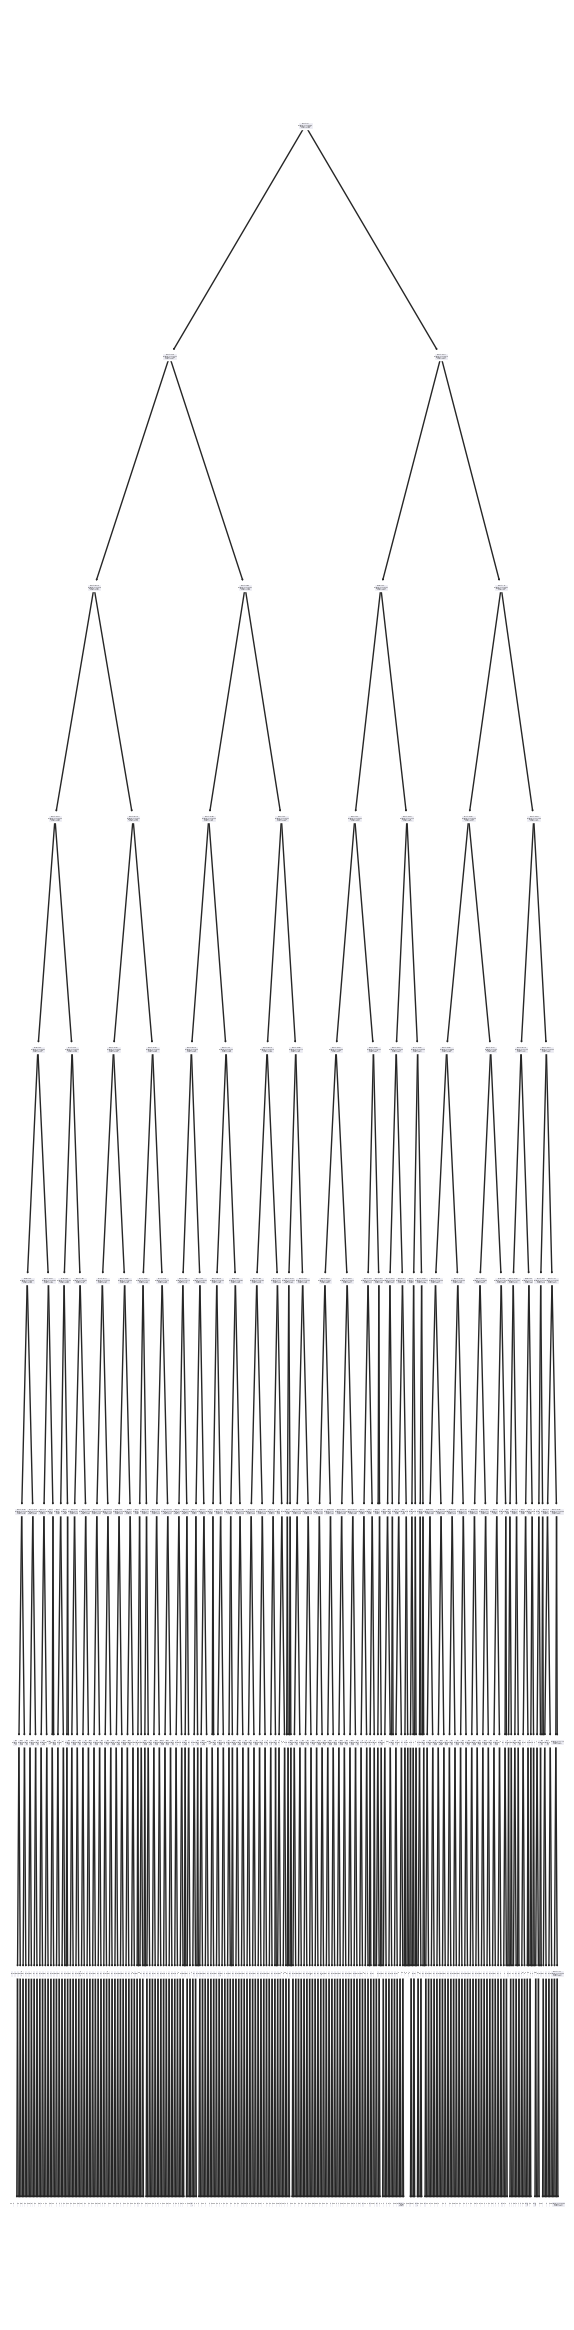

In [74]:
from sklearn import tree

tree.plot_tree(DTree)